# vector calculus R^n -> R

## dummy examples

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as FF
from sklearn.datasets import load_iris

torch.set_default_dtype(torch.float64)


In [2]:
# R->R
# f(x) = x^2
x = torch.tensor(2.0, requires_grad=True)
f = x**2

f.backward()
x.grad   # at x = 2 the gradient of f(x) is 2x = 2*2 = 4

tensor(4.)

In [3]:
# R^n -> R
# f(x1,x2) = x1^2 + 2x2

x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

f = x1**2 + 3*x2

f.backward()
x1.grad, x2.grad

(tensor(4.), tensor(3.))

In [4]:
# R^n -> R
# f(x1,x2) = x1^2 + 2x2
# x1 and x2 depend on t R -> R^2 (input t and output x1,x2)
t = torch.tensor(3.0, requires_grad = True)

x1 = 2*t
x2 = 3*t**3

f = x1**2 + 3*x2

f.backward()
t.grad

tensor(267.)

## Vector example

**f: R^3 -> R**

and

**x: R^2 -> R**

In [5]:
# R^n -> R
# f(x1,x2,x3) = x1^2 + 2x2 + sin(x3)
# x1, x2, x3 depend on t and s R^2->R^3 (input t and s and output x1,x2,x3)
t = torch.tensor(3.0, requires_grad = True)
s = torch.tensor(4.0, requires_grad=True)

x1 = 2*t+s**3
x2 = 3*t**3/s
x3 = torch.sin(t)*s

f = x1**2 + 3*x2 + torch.sin(x3)

f.backward()
print("∂f/∂t =", t.grad.item())
print("∂f/∂s =", s.grad.item())

∂f/∂t = 337.40435249210566
∂f/∂s = 6704.931727621649


In [6]:
# we can rewrite it as:
t = torch.tensor(3.0, requires_grad = True)
s = torch.tensor(4.0, requires_grad=True)
def f_of_ts(t,s):
    # R^2 -> R
    x1 = 2*t + s**3
    x2 = 3*t**3 / s
    x3 = torch.sin(t) * s
    return x1**2 + 3*x2 + torch.sin(x3)

J_f_ts = torch.autograd.functional.jacobian(f_of_ts, (t, s))
torch.stack(J_f_ts, dim = 0)
# ∂f/∂t, ∂f/∂s


tensor([ 337.4044, 6704.9317])

In [7]:
# we can rewrite it as 2 parts, the jacobian from f to x and the jacobian from x to (t,s):
x1 = 2*t+s**3
x2 = 3*t**3/s
x3 = torch.sin(t)*s

def f_of_x(x1,x2,x3):
  # gradient
  return x1**2 + 3*x2 + torch.sin(x3)

J_f_x = torch.autograd.functional.jacobian(f_of_x, (x1,x2,x3))
J_f_x_ = torch.stack(J_f_x, dim = 0)
J_f_x_
# [∂f/∂x1, ∂f/∂x2 , ∂f/∂x3]
# 1x3

tensor([140.0000,   3.0000,   0.8449])

In [8]:
t = torch.tensor(3.0, requires_grad=True)
s = torch.tensor(4.0, requires_grad=True)

def x_of_ts(t, s):
    # R^2-->R^3
    x1 = 2*t + s**3
    x2 = 3*t**3 / s
    x3 = torch.sin(t) * s
    return torch.stack([x1, x2, x3])  # vector R^3

J_x_ts = torch.autograd.functional.jacobian(x_of_ts, (t, s))
J_x_ts_ = torch.stack(J_x_ts, dim = 1)
J_x_ts_
# [∂x1/∂t , ∂x2/∂s]
# [∂x2/∂t , ∂x2/∂s]
# [∂x3/∂t , ∂x3/∂s]
# 3x2

tensor([[ 2.0000, 48.0000],
        [20.2500, -5.0625],
        [-3.9600,  0.1411]])

In [9]:
# J_f_ts = torch.stack(J_f_x, dim = 0) @ torch.stack(J_x_ts, dim = 1) # 2x1
J_f_ts = J_f_x_ @ J_x_ts_
J_f_ts

# the result is exactly the same as the one we found before when we computed the jacobian directly for f_of_ts

tensor([ 337.4044, 6704.9317])

## viz

In [74]:
#############################################################################
# fun functions:
def f_of_ts(t, s):
    return torch.sin(t) * torch.cos(s) + t**2 - s**2
# def f_of_ts(t, s):
#     return torch.atan2(s, t + 1e-3) + 0.1*(t**2 + s**2)
# def f_of_ts(t, s):
#     return torch.sin(t**2 + s**2) + 0.5*torch.cos(3*t)*torch.sin(2*s)
#############################################################################
# original function:
# def f_of_ts(t,s):
#     """R^2 -> R"""
#     x1 = 2*t + s**3
#     x2 = 3*t**3 / s
#     x3 = torch.sin(t) * s
#     return x1**2 + 3*x2 + torch.sin(x3)
#############################################################################
n = 30
t_vals = torch.linspace(-n/2, n/2, n, dtype=torch.float64)
s_vals = torch.linspace(-n/2, n/2, n, dtype=torch.float64)

results = torch.zeros((n,n,2))
for i,ti in enumerate(t_vals):
  jacobian_row = []
  for j,sj in  enumerate(s_vals):
    ti = ti.clone().requires_grad_(True) # to avoid warning
    sj = sj.clone().requires_grad_(True) # to avoid warning
    J = torch.autograd.functional.jacobian(f_of_ts, (ti, sj))
    results[i][j] = torch.stack(J, dim=0) # [df/dt, df/ds]

results.shape


torch.Size([30, 30, 2])

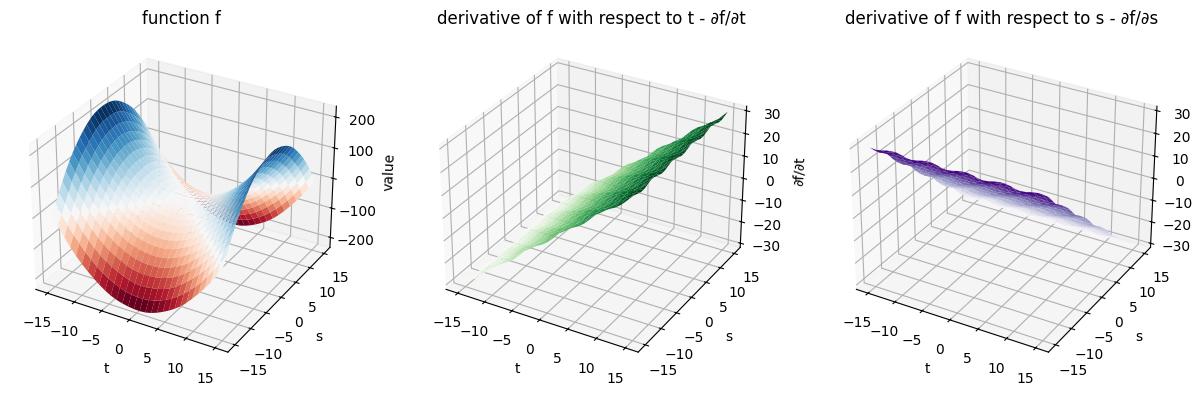

In [75]:
fig, ax = plt.subplots(1,3, figsize = (15,15),subplot_kw={"projection": "3d"})

ax[0].plot_surface(*torch.meshgrid(t_vals,s_vals),f_of_ts(*torch.meshgrid(t_vals,s_vals)), cmap = "RdBu")
ax[1].plot_surface(*torch.meshgrid(t_vals,s_vals),results[:,:,0], cmap = "Greens")
ax[2].plot_surface(*torch.meshgrid(t_vals,s_vals),results[:,:,1], cmap = "Purples")

ax[0].set_title("function f")
ax[0].set_xlabel("t")
ax[0].set_ylabel("s")
ax[0].set_zlabel("value")

ax[1].set_title("derivative of f with respect to t - ∂f/∂t")
ax[1].set_xlabel("t")
ax[1].set_ylabel("s")
ax[1].set_zlabel("∂f/∂t")

ax[2].set_title("derivative of f with respect to s - ∂f/∂s")
ax[2].set_xlabel("t")
ax[2].set_ylabel("s")
ax[2].set_zlabel("∂f/∂s")
plt.show()
# t and s are modifying the value of the function via x1,x2 and x3.
# nota bene:  ∂f/∂t dipende anche dal valore di s, this is because when computing the derivative wrt t for f --> some dependencies for s remain,
# for example, consider the function:
# f(x1,x2) = x1+3*x2
# x1 = s+3t
# x2 = s*t^2+s^2
# apply the chain rule:
# ∂f/∂t = ∂f/∂x1 * ∂x1/∂t +  ∂f/∂x2 * ∂x2/∂t = (1)*(3) + (3)*(2t*s) = 3+6ts
# ∂f/∂s = ∂f/∂x1 * ∂x1/∂s +  ∂f/∂x2 * ∂x2/∂s = (1)*(1) + (3)*(t^2 + 2s) = 1 + 3t^2 + 6s
# as we can see both the functions dependencie for both t and s

# expression above is equivalent to:
# [∂f/∂x1, ∂f/∂x2] @ [[∂x1/∂t,∂x1/∂s],[∂x2/∂t, ∂x2/∂s]] = [∂f/∂t,∂f/∂s]



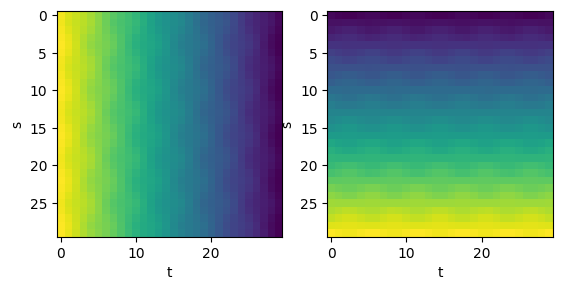

In [76]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(results[:,:,1])
ax[1].imshow(results[:,:,0])

for a in ax:
  a.set_xlabel("t")
  a.set_ylabel("s")

In [77]:
# we can also show the gradient of the function using arrows.
# given a meshgrid, we can trace from each one of its points an arrow
# which will have it's head at the value corresponding to (∂f/∂t, ∂f/∂s)

n = 30
t_vals = torch.linspace(-n/2, n/2, n, dtype=torch.float64)
s_vals = torch.linspace(-n/2, n/2, n, dtype=torch.float64)

results = torch.zeros((n,n,2))
for i,ti in enumerate(t_vals):
  jacobian_row = []
  for j,sj in  enumerate(s_vals):
    ti = ti.clone().requires_grad_(True) # to avoid warning
    sj = sj.clone().requires_grad_(True) # to avoid warning
    J = torch.autograd.functional.jacobian(f_of_ts, (ti, sj))
    results[i][j] = torch.stack(J, dim=0) # [df/dt, df/ds]

results.shape


torch.Size([30, 30, 2])

In [78]:
T,S = torch.meshgrid(t_vals, s_vals)
df_dt = results[:,:,0]
df_ds = results[:,:,1]

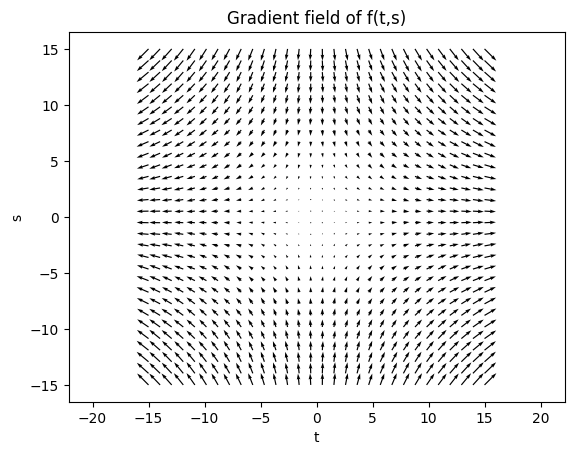

In [79]:
fig,ax = plt.subplots(1,1)

ax.quiver(T,S, df_dt, df_ds)
ax.set_xlabel("t")
ax.set_ylabel("s")
ax.set_title("Gradient field of f(t,s)")
ax.axis("equal")
plt.show()
# each arrow represents the direction where we have to head in order (in the s,t coordinate plane) for the function f to increase.

# let's see it working with R^n -> R^m

**f: R^n -> R^m**

and

**x: R^2 -> R**

In [612]:
# vector valued functions are functions like:

# F = (f1(x1...xn), f2(x1 .. xn), ... , fm(x1...xn))
# a practica example is:
def F_of_x(x: torch.tensor):
  """a function that takes a 1x4 input and returns a 6x1 output"""
  A = torch.normal(0,1,(6,4), dtype = torch.float32 )
  b = torch.normal(0,1,(6,1))
  return A@x + b # 6x4 @ 4x1 + 6x1 = 6x1

F_of_x(torch.tensor([1,2,3,4],dtype = torch.float32).unsqueeze(dim = 1))

tensor([[  5.2140],
        [ -0.5366],
        [-11.0878],
        [ -5.3270],
        [ -0.5695],
        [ -1.6691]])

F(x)=Ax+b

In [613]:
# the one above is a classical example of a EXTREMELY simple Neural Net, where we input a 4x1 vector (the dataset features)
# and we output a 6x1 vector, that can be interpreted for example as probabilities, or we can just pass them to other layers of the model

## NN

In [614]:
# let's try to recreate a really small neural net:
A = torch.normal(0,1,(6,4), dtype = torch.float32)
b = torch.normal(0,1,(6,1))
# A and b are initialized ONE time, and set as input to calculate the gradient
def F_of_x(A,b, x: torch.tensor):
  """a function that takes a 1x4 input and returns a 6x1 output"""
  return A@x + b # 6x4 @ 4x1 + 6x1 = 6x1

F_of_x(A,b,torch.tensor([1,2,3,4],dtype = torch.float32).unsqueeze(dim = 1))

tensor([[ -0.0114],
        [  5.2734],
        [  0.3723],
        [  4.9922],
        [-10.2126],
        [ -4.1286]])

In [615]:
# we can calculate the jacobian, it is gona be a matrix that contains the partial derivative
# of F wrt x1,x2,x3,x4. thus it is gona be a 6x4 matrix, exactly like the matrix A,
# and it will have the same exact values, because the derivative of a constant multiplied by x will be the constant (Ax)
x0 = torch.tensor([1,2,3,4], dtype=torch.float32).unsqueeze(1)  # 4x1

J_F_of_x = torch.autograd.functional.jacobian(F_of_x, (A,b,x0) )
J_A, J_b, J_x = J_F_of_x

In [616]:
J_A.squeeze().shape, J_b.squeeze().shape, J_x.squeeze().shape
# 6,4 for example means that the derivative of F with respect to each one of the xs has a shape of 4 as x dimension and 6 possible As
# ∂F/∂A, ∂F/∂b, ∂F/∂x

(torch.Size([6, 6, 4]), torch.Size([6, 6]), torch.Size([6, 4]))

In [618]:
torch.allclose(J_x.reshape(A.shape),A) # as we can see the derivative is exactly A.

True

## really build it

In [619]:
# now we can add a bit of non linearity
input_layer_dimension = 4
hidden__layer_dimension = 10
output_layer_dimension = 3
A1 = torch.normal(0,1,(hidden__layer_dimension,input_layer_dimension), dtype = torch.float32)
b1 = torch.normal(0,1,(hidden__layer_dimension,1),dtype = torch.float32)
A2 = torch.normal(0,1,(output_layer_dimension,hidden__layer_dimension), dtype = torch.float32)
b2 = torch.normal(0,1,(output_layer_dimension,1),dtype = torch.float32)

def F_of_x(A1,A2,b1,b2, x):
  """a function that takes a 1x4 input and returns a 4x1 output"""
  return FF.softmax(A2@FF.relu(A1@x + b1) + b2, dim = 0)

x0 = torch.tensor([1,2,3,4],dtype = torch.float32).unsqueeze(dim = 1)
F_of_x(A1,A2,b1,b2,x0) # forward pass

tensor([[2.2986e-01],
        [7.7014e-01],
        [1.8822e-06]], dtype=torch.float32)

In [620]:
# J_F_of_x = torch.autograd.functional.jacobian(F_of_x, (A1,A2,b1,b2,x0))
# J_A1,J_A2, J_b1,J_b2, J_x = J_F_of_x
# J_A1,J_A2, J_b1,J_b2, J_x = J_A1.squeeze(),J_A2.squeeze(), J_b1.squeeze(),J_b2.squeeze(), J_x.squeeze()

# we don't need anymore to compute these, because we are going to define a function that takes in input
# A1,A2,b1,b2,x0 and the target variable, and tells us in output how bad the model is. then we are goign to compute the jacobian on that.

In [623]:
# load the data
data = load_iris()
X, y = torch.tensor(data.data, dtype = torch.float32), torch.tensor(data.target)  # X is (150,4), y is (150,)
X.shape,y.shape
y_one_hot_encoded = FF.one_hot(y)

(torch.Size([150, 4]), torch.Size([150]))

In [635]:
# try a forward pass with data
x0 = X[0].reshape((X[0].shape[0],1))#.unsqueeze(dim = 1)
F_of_x(A1,A2,b1,b2,x0) # forward pass

tensor([[4.1792e-07],
        [1.0000e+00],
        [9.9224e-10]], dtype=torch.float32)

In [626]:
# define the cross entropy we are going to use:
# def cross_entropy_loss(pred, target):
#   eps = 1e-9
#   return -sum([y_i_target * torch.log(y_i_pred+ eps) for y_i_target,y_i_pred in zip(pred,target)])
# y0 = y_one_hot_encoded[0]
# cross_entropy_loss(pred = x0, target = y0)

In [628]:
# in order to compute the jacobian we need it to have as input all the inputs of F_of_x:
def cross_entropy_loss(target,A1,A2,b1,b2, x):
  eps = 1e-9
  y_pred = F_of_x(A1,A2,b1,b2,x) # forward pass
  return -sum([y_i_target * torch.log(y_i_pred+eps) for y_i_target,y_i_pred in zip(y_pred,target)])

#### ONE PASS

In [629]:
i = 40
y0 = y_one_hot_encoded[i].to(dtype = torch.float32)
x0 = X[i].unsqueeze(dim = 1)

In [630]:
# now we can easily calculate the derivative of the loss function with respect to the parameters
cross_entropy_loss(y0,A1,A2,b1,b2,x0)

tensor([20.7233], dtype=torch.float32)

In [583]:
J_LOSS_of_x = torch.autograd.functional.jacobian(cross_entropy_loss, (y0,A1,A2,b1,b2, x0))
J_y0, J_A1,J_A2, J_b1,J_b2, J_x = J_LOSS_of_x

In [584]:
J_y0, J_A1, J_A2, J_b1, J_b2, J_x = J_y0.reshape(y0.shape),J_A1.reshape(A1.shape),J_A2.reshape(A2.shape), J_b1.reshape(b1.shape),J_b2.reshape(b2.shape), J_x.reshape(x0.shape)

In [585]:
lr = 10e-8
A1 = A1-lr*J_A1
A2 = A2-lr*J_A2
b1 = b1-lr*J_b1
b2 = b2-lr*J_b2

In [586]:
cross_entropy_loss(y0,A1,A2,b1,b2,x0)

tensor([20.7233], dtype=torch.float32)

#### making more passes

In [592]:
# number of samples to pick each epoch
batch_size = 50
lr = 1e-2

for epoch in range(10):
    perm = torch.randperm(len(X)) # take a random permutation of the indexes of x
    # take a random subset
    batch_idx = perm[:batch_size]

    for i in batch_idx:
        y0 = y_one_hot_encoded[i].to(dtype=torch.float32)
        x0 = X[i].unsqueeze(1)

        # compute loss
        loss = cross_entropy_loss(y0, A1, A2, b1, b2, x0)

        # jacobian wrt parameters
        J = torch.autograd.functional.jacobian(
            cross_entropy_loss, (y0, A1, A2, b1, b2, x0)
        )
        _, J_A1, J_A2, J_b1, J_b2, _ = J

        # reshape
        J_A1 = J_A1.reshape(A1.shape)
        J_A2 = J_A2.reshape(A2.shape)
        J_b1 = J_b1.reshape(b1.shape)
        J_b2 = J_b2.reshape(b2.shape)

        # update step
        A1 = A1 - lr * J_A1
        A2 = A2 - lr * J_A2
        b1 = b1 - lr * J_b1
        b2 = b2 - lr * J_b2

    print(f"epoch {epoch} loss:", loss.item())


epoch 0 loss: 4.071250281345584e-12
epoch 1 loss: 5.8868799591993426e-12
epoch 2 loss: 20.7232666015625
epoch 3 loss: 20.7232666015625
epoch 4 loss: 20.7232666015625
epoch 5 loss: 20.7232666015625
epoch 6 loss: 1.9411039006082646e-14
epoch 7 loss: 20.7232666015625
epoch 8 loss: 20.7232666015625
epoch 9 loss: 20.7232666015625


In [641]:
k = 23
x_test = X[k].unsqueeze(dim = 1)
y_test = y[k]
print("target:",y_test.item(),"| prediction:", torch.argmax(F_of_x(A1,A2,b1,b2, x_test)).item())

target: 0 | prediction: 1
